In [1]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
from wingstructure.aero.multhop import multhop, _multhop_solve

π = np.pi

# Validation Multhopp Method

## Circulation Distribution

Reference data taken from *H.Schlichting, E.Truckenbrodt-Aerodynamik des Flugzeugs*

[0, 7.5]
[0, 7.5]
[0, 7.5]
[0, 7.5]
[0, 7.5]


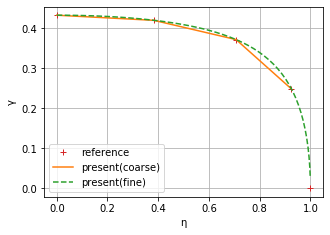

In [2]:
#from warnings import warn, simplefilter
#simplefilter('error')

plt.figure(figsize=(5,3.5))

Λ = 6 # aspect ratio of wing

b = 15 # m span width
cs = [b/Λ]*2 # depth of wing
ys = [0, b/2] # section positions

S = b * cs[0]

αs = [1]*2 # angle of attack
dcls = [2*np.pi]*2

# reference results
ηs_ref = [0,0.3827,0.7071,0.9239,1]
γs_ref = [0.4320,0.4192,0.3710,0.2485,0]

plt.plot(ηs_ref, γs_ref, 'C3+', label='reference')

# coarse calculation
M = 7

res = multhop(ys, αs, cs, dcls, S, b, M = M)
res2 = multhop(ys, αs, cs, dcls, S, b, M = M)
res3 = multhop(ys, αs, cs, dcls, S, b, M = 91)
res4 = multhop(ys, αs, cs, dcls, S, b, M = 19)

plt.plot(res.ys[M//2:]/b*2, res.γs[M//2:], 'C1', label='present(coarse)')


# finer calculation
M = 91

res5 = multhop(ys, αs, cs, dcls, S, b, M = M)

plt.plot(res5.ys[M//2:]/b*2, res5.γs[M//2:], 'C2--', label='present(fine)')

# layout
plt.xlabel('η')
plt.ylabel('γ')
plt.grid()
plt.legend(loc='best');

plt.savefig('validation_multhopp.pdf', bbox_inches='tight')